## without class_weigth

### Create The Model

In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r X_val
%store -r y_val


In [2]:
X_train.shape

(6399, 11)

In [3]:
X_test.shape

(2000, 11)

In [4]:
# Build the model 


tf.random.set_seed(42)
## Dense to build hidden & output  lyer
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(units=1, activation= 'sigmoid')  
])

In [5]:
# Compile the model 

## How u want to train the model? which optimizer suitable for ur case?and what metrics u wil focus on?what loss u will use it!
model.compile(loss='binary_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

In [6]:
# Fit the model 
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.7637 - val_loss: 0.4328 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8056 - val_loss: 0.4048 - val_accuracy: 0.8094
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8275 - val_loss: 0.3832 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8497 - val_loss: 0.3707 - val_accuracy: 0.8456
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8556 - val_loss: 0.3538 - val_accuracy: 0.8481
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8603 - val_loss: 0.3501 - val_accuracy: 0.8519
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8604 - val_loss: 0.3494 - val_accuracy: 0.8506

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [8]:
model.history.history

{'loss': [0.5159304738044739,
  0.422331303358078,
  0.3952871859073639,
  0.37140485644340515,
  0.3564744293689728,
  0.3475940525531769,
  0.342742919921875,
  0.34033793210983276,
  0.335886150598526,
  0.3331357538700104,
  0.3311527669429779,
  0.3296672999858856,
  0.32775139808654785,
  0.3263240158557892,
  0.3236774802207947,
  0.3230971395969391,
  0.32214057445526123,
  0.3214097321033478,
  0.3189389407634735,
  0.3180088400840759,
  0.3162005543708801,
  0.31532883644104004,
  0.31343182921409607,
  0.3129690885543823,
  0.31135302782058716,
  0.3107370436191559,
  0.3095708191394806,
  0.30879223346710205,
  0.30712294578552246,
  0.3056963086128235,
  0.3045729696750641,
  0.3046121895313263,
  0.3024241626262665,
  0.30191996693611145,
  0.30075737833976746,
  0.30037686228752136,
  0.29976481199264526,
  0.29942843317985535,
  0.29786843061447144,
  0.29797446727752686,
  0.29660433530807495,
  0.2956070601940155,
  0.2954784631729126,
  0.29500558972358704,
  0.29443

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


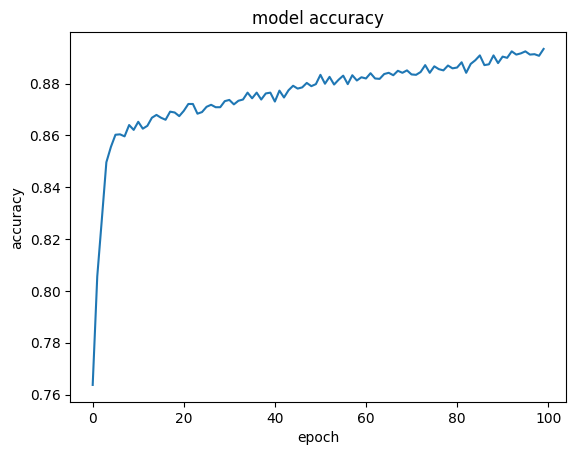

In [10]:
#Summary history for accuracy 


plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

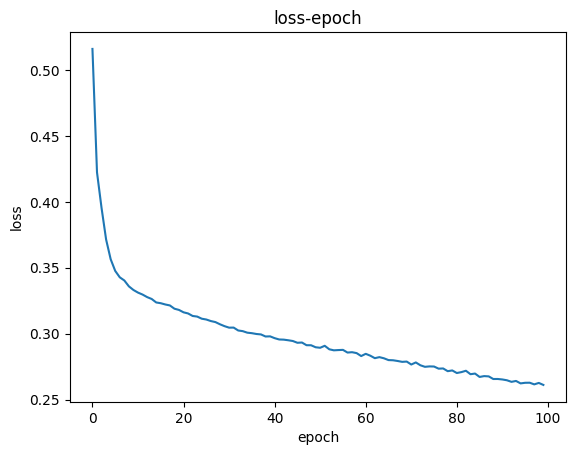

In [11]:
#Summary history for loss 
plt.plot(history.history['loss'])
plt.title('loss-epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

<Axes: >

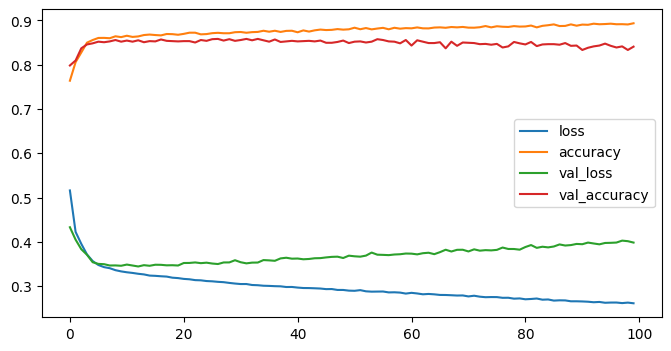

In [12]:


pd.DataFrame(history.history).plot(figsize=(8,4))

In [14]:
model.evaluate(X_val, y_val, verbose=0)

[0.39821857213974, 0.840624988079071]

In [ ]:
#- Make prediction to see "confusion matrix" and "classification report"


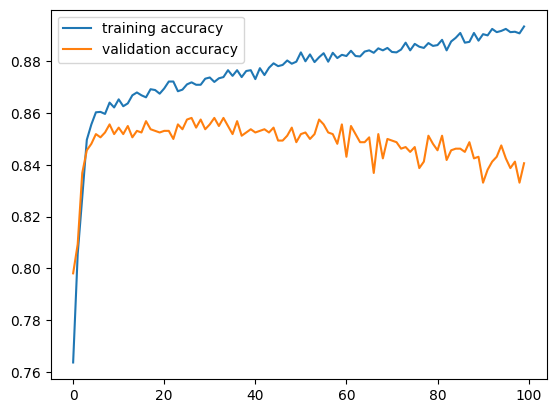

In [15]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [16]:
# Model prediction
y_pred = model.predict(X_val) > 0.5

50/50 [==============================] - 0s 1ms/step


In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1190   84]
 [ 171  155]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1274
           1       0.65      0.48      0.55       326

    accuracy                           0.84      1600
   macro avg       0.76      0.70      0.73      1600
weighted avg       0.83      0.84      0.83      1600



In [ ]:
y_test_resh= y_test.values.reshape(-1,1)


In [ ]:
# y_y_test_resh.shape , y_pred.shape 

In [ ]:
#i got error here :AttributeError: 'Series' object has no attribute 'reshape'
# fix it using: y_test= y_test.values.reshape(-1,1)
# y_test_resh= y_test.values.reshape(-1,1)
# np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)

 1/50 [..............................] - ETA: 1s

50/50 [==============================] - 0s 1ms/step


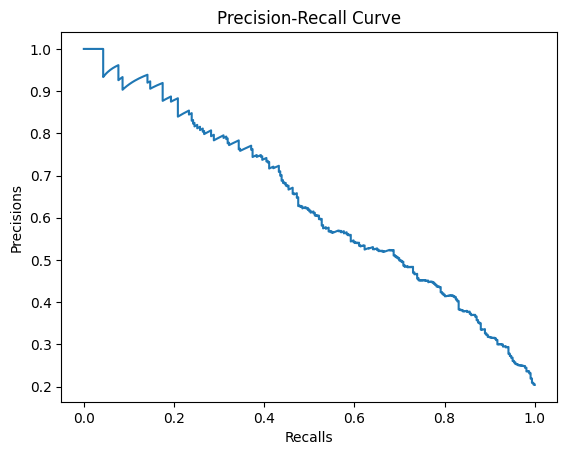

In [20]:
#- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import precision_recall_curve, roc_auc_score

y_pred_proba = model.predict(X_val)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
plt.plot(recalls, precisions)
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
# if the data imbalnced we focus on recall, f1score and precision لانه الكنفيوزن ماتركس خربانه فيعطيني اكيورسي عالي عشان كذا المفروض م اهتم فيها 
# .. ..  balanced see accuracy